### Linear Regression

* Initalize the class with Learning Rate and Number of Iterations to run for.
* Initalize the weights (based on features) and bias.
* Build the objective function and find ypred.
* Using Loss Function (MSE or MAE), find the error.
* Gradient Descent Algorithm on Objective Function
* Update weights based on GD
* Repeat from step 3, until the objective function is converged.

In [1]:
import numpy as np

In [2]:
class LinearRegression:
    def __init__(self, lr, iters=100):
        self.lr = lr
        self.iters = iters
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.iters):
            y_predict = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_predict - y))
            db = (1/n_samples) * np.sum(y_predict - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db
        
    def predict(self, X):
        y_predict = np.dot(X, self.weights) +self.bias
        return y_predict

MSE: 305.77413160554664


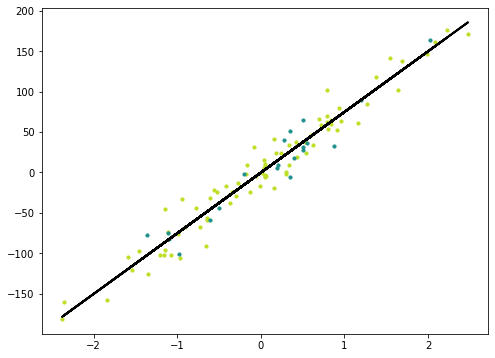

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

regressor = LinearRegression(lr=0.01, iters=2000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
    
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

y_pred_line = regressor.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label="Prediction")
plt.show()